In [1]:
#Bibliotecas recomendadas
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Medidas de dispersão

In [9]:
morb = pd.read_csv('https://raw.githubusercontent.com/stefanomozart/estatistica_descritiva/main/dados/originais/morbidade/consolidado/consolidado.csv', low_memory=False)
display(morb.shape)

morb.rename(columns = {
    'Valor_serviços_profissionais':'val_profissionais',
    'Valor_serviços_hospitalares': 'val_hospitalares',
    'Valor_serviços_de_saúde': 'val_saude',
    'Valor_médio_intern': 'val_medio',
    'Valor_total': 'total',
    'Média_permanência': 'md_permanencia',
    'Óbitos': 'Obitos',
    'Taxa_mortalidade': 'mortalidade',
}, inplace = True)
morb.total = morb.total.str.replace(',','.').astype(float)

def toFloat(s):
    s = s.replace(',','.').replace('...','')
    try:
        return float(s)
    except:
        return pd.NA

morb.val_medio = morb.val_medio.apply(toFloat)
morb.md_permanencia = morb.md_permanencia.apply(toFloat)
morb.mortalidade = morb.mortalidade.apply(toFloat)
morb.head(2)

(96711, 21)

,Município,Internações,AIH_aprovadas,total,val_hospitalares,Val_serv_hosp_-_compl_federal,Val_serv_hosp_-_compl_gestor,val_profissionais,Val_serv_prof_-_compl_federal,Val_serv_prof_-_compl_gestor,...,val_medio,Dias_permanência,md_permanencia,Obitos,mortalidade,mes,ano,mes_ano,cod_ibge6,Data
0,Alta Floresta D'Oeste,193,193,108779.39,"86944,43",-,-,"21834,96",-,-,...,563.62,623,3.2,3,1.55,Dez,2019,2019-12-01,110001,NaN
1,Alto Alegre dos Parecis,57,57,42379.12,"34540,82",-,-,"7838,30",-,-,...,743.49,276,4.8,1,1.75,Dez,2019,2019-12-01,110037,NaN


## Histograma

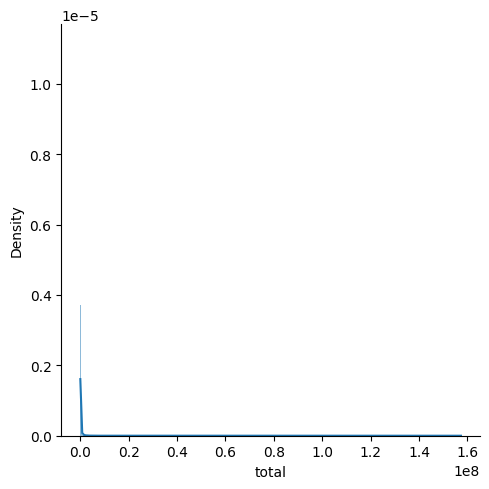

In [11]:
sns.displot(x=morb.total, stat='density', kde=True)

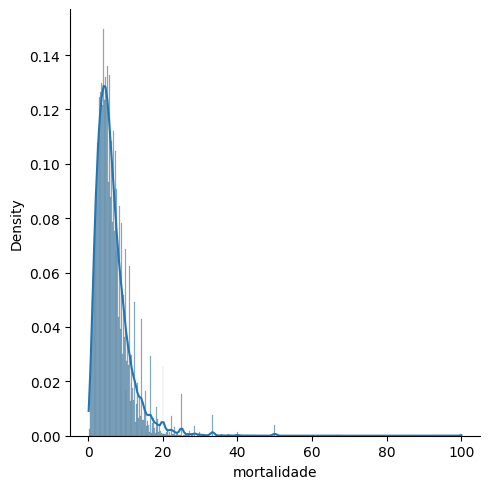

In [12]:
sns.displot(x=morb.mortalidade, stat='density', kde=True)

## Boxplot

<Axes: xlabel='total'>

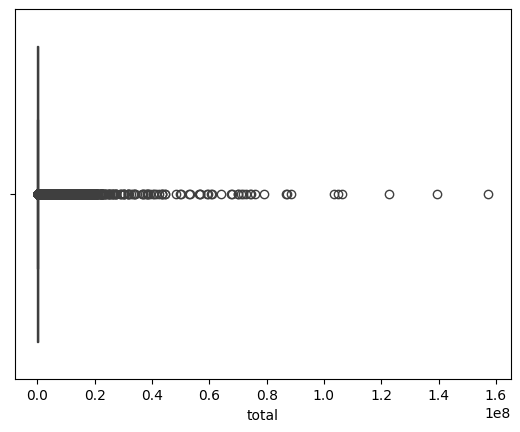

In [13]:
sns.boxplot(x=morb.total)

<Axes: ylabel='mortalidade'>

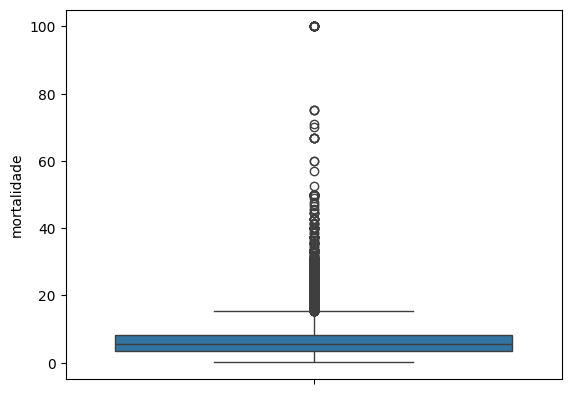

In [14]:
sns.boxplot(morb.mortalidade)

## Amplitude amostral

In [15]:
# Amplitude pra variável 'Total'
A_total = morb.total.max() - morb.total.min()
A_total

157370724.62

In [16]:
A_mortalidade = morb.mortalidade.max() -  morb.mortalidade.min()
A_mortalidade

99.87

## Intervalo Interquartílico

In [19]:
Q1_total = morb.total.quantile(0.25)
Q3_total = morb.total.quantile(0.75)

IIQ_total = Q3_total - Q1_total
IIQ_total

123519.33500000002

In [20]:
Q1_mortalidade = morb.mortalidade.quantile(0.25)
Q3_mortalidade = morb.mortalidade.quantile(0.75)

IIQ_mortalidade = Q3_mortalidade - Q1_mortalidade
IIQ_mortalidade

4.764999999999999

## Coeficiente de Dispersão Quartílica

In [21]:
CDQ_total = IIQ_total / (Q3_total + Q1_total)
CDQ_total

0.7097978343866436

In [22]:
CDQ_mortalidade = IIQ_mortalidade / (Q3_mortalidade + Q1_mortalidade)
CDQ_mortalidade

0.4043275350021213

## Desvio Absoluto Médio

In [23]:
DAM_total = np.abs(morb.total - morb.total.mean()).mean()
DAM_total

393622.0933051062

In [24]:
DAM_mortalidade = np.abs(morb.mortalidade - morb.mortalidade.mean()).mean()
DAM_mortalidade

3.289202626794544

## Desvio Absoluto Mediano

In [25]:
MAD_total = np.median(np.absolute(morb.total - morb.total.median()))
MAD_total

44174.59

In [38]:
absd = pd.Series(np.absolute(morb.mortalidade - morb.mortalidade.median()))
MAD_mortalidade = absd.median()
MAD_mortalidade

2.2200000000000006

In [40]:
stats.median_abs_deviation(morb[morb.mortalidade.notna()].mortalidade, scale=1)

2.2200000000000006

## Variância

In [46]:
S2_total = morb.total.var()
S2_total

3770633303357.6855

In [47]:
S2_mortalidade = morb.mortalidade.var()
S2_mortalidade

24.80916122495773

## Desvio Padrão

In [48]:
S_total = morb.total.std()
S_total

1941811.8609581324

In [50]:
S_mortalidade = morb.mortalidade.std()
S_mortalidade

4.980879563386143

## Coeficiente de Variação Amostral

In [59]:
CV_total = (S_total / morb.total.mean()) * 100
CV_total

650.5776530417787

In [60]:
CV_mortalidade = (S_mortalidade / morb.mortalidade.mean()) * 100
CV_mortalidade

85.7238131522152

# Histograma

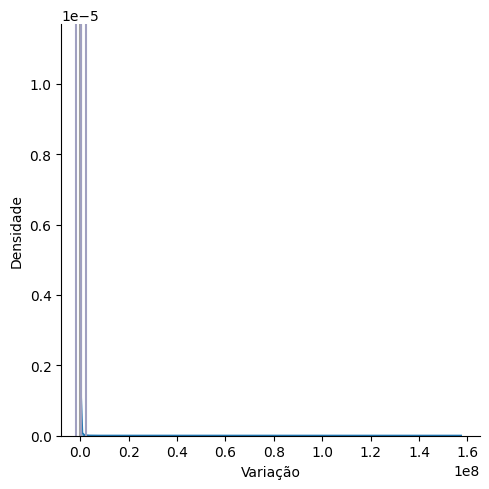

In [55]:
ax = sns.displot(morb, x='total', stat='density', kde=True)
ax.set(xlabel='Variação', ylabel='Densidade')

# IIQ
plt.axvline(x=Q1_total, color='#a0a0a0ff')
plt.axvline(x=Q3_total, color='#a0a0a0ff')

# Desvio Padrao
xbar_total = morb.total.mean()
plt.axvline(x=xbar_total, color='#a0a0c0ff')
plt.axvline(x=xbar_total-S_total, color='#a0a0c0ff')
plt.axvline(x=xbar_total+S_total, color='#a0a0c0ff')

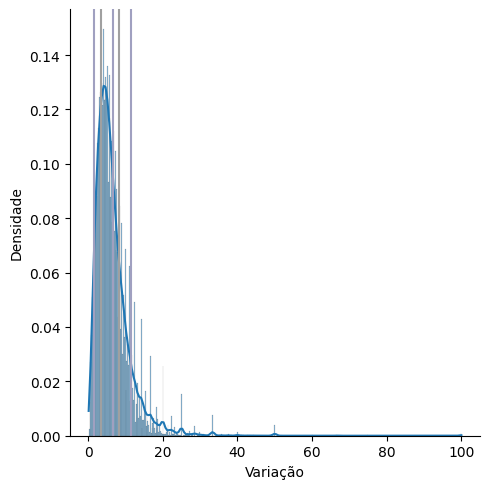

In [56]:
ax = sns.displot(morb, x='mortalidade', stat='density', kde=True)
ax.set(xlabel='Variação', ylabel='Densidade')

# IIQ
plt.axvline(x=Q1_mortalidade, color='#a0a0a0ff')
plt.axvline(x=Q3_mortalidade, color='#a0a0a0ff')

# Desvio Padrao
xbar_mortalidade = morb.mortalidade.mean()
plt.axvline(x=xbar_mortalidade, color='#5060a0ff')
plt.axvline(x=xbar_mortalidade-S_mortalidade, color='#5060a0ff')
plt.axvline(x=xbar_mortalidade+S_mortalidade, color='#5060a0ff')

## Exemplo de tratamento de outliers

In [57]:
def eliminaOutliers(s):
    Md = s.mode()[0]
    return s.apply(lambda x: x if x is pd.NA or x<2*Md else pd.NA)

morb.mortalidade = eliminaOutliers(morb.mortalidade)

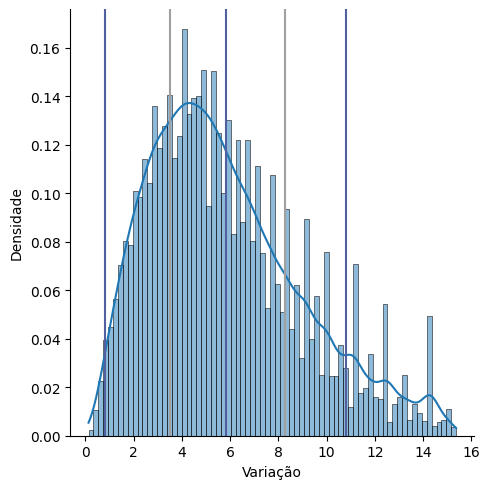

In [58]:
ax = sns.displot(morb, x='mortalidade', stat='density', kde=True)
ax.set(xlabel='Variação', ylabel='Densidade')

# IIQ
plt.axvline(x=Q1_mortalidade, color='#a0a0a0ff')
plt.axvline(x=Q3_mortalidade, color='#a0a0a0ff')

# Desvio Padrao
xbar_mortalidade = morb.mortalidade.mean()
plt.axvline(x=xbar_mortalidade, color='#5060a0ff')
plt.axvline(x=xbar_mortalidade-S_mortalidade, color='#5060a0ff')
plt.axvline(x=xbar_mortalidade+S_mortalidade, color='#5060a0ff')

# Análise paramétrica

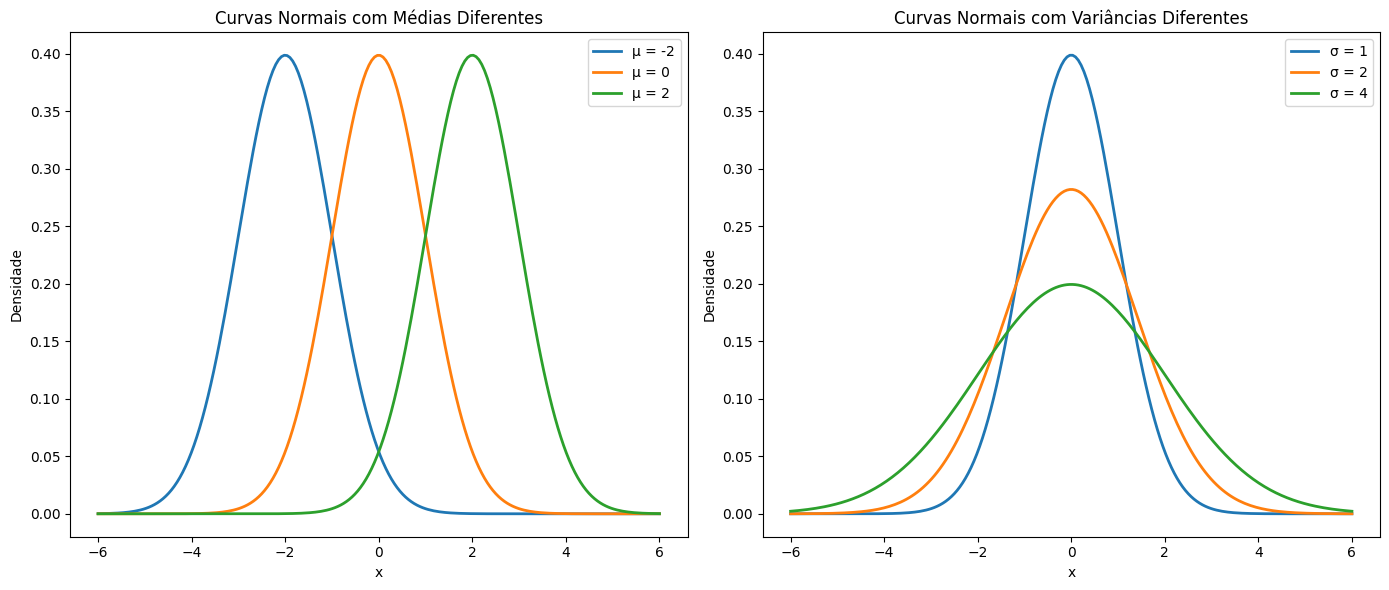

In [ ]:
# Cria um array de valores para o eixo x
x = np.linspace(-6, 6, 200)

# Função para calcular a função densidade de probabilidade (pdf) da normal
def normal_pdf(x, mean=0, std=1):
    return 1 / (np.sqrt(2 * np.pi) * std) * np.exp(-0.5 * ((x - mean) / std) ** 2)

# --- Curvas com médias diferentes (variância fixa) ---
mean = [-2, 0, 2]  # Médias diferentes
std = 1            # Mesma variância (variância = std^2 = 1)
ym = [normal_pdf(x, mean=m, std=std) for m in mean]

# --- Curvas com variâncias diferentes (média fixa) ---
std = [1, 2, 4]    # variâncias diferentes (1, 2 e 4)
yv = [normal_pdf(x, mean=0, std=s**.5) for s in std]

# Cria uma figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot das curvas com médias diferentes
for i in range(3):
  axes[0].plot(x, ym[i], label=f'μ = {mean[i]}', lw=2)
axes[0].set_title('Curvas Normais com Médias Diferentes')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Densidade')
axes[0].legend()

# Plot das curvas com variâncias diferentes
for i in range(3):
  axes[1].plot(x, yv[i], label=f'σ = {std[i]}', lw=2)
axes[1].set_title('Curvas Normais com Variâncias Diferentes')
axes[1].set_xlabel('x')
axes[1].set_ylabel('Densidade')
axes[1].legend()

plt.tight_layout()
plt.show()

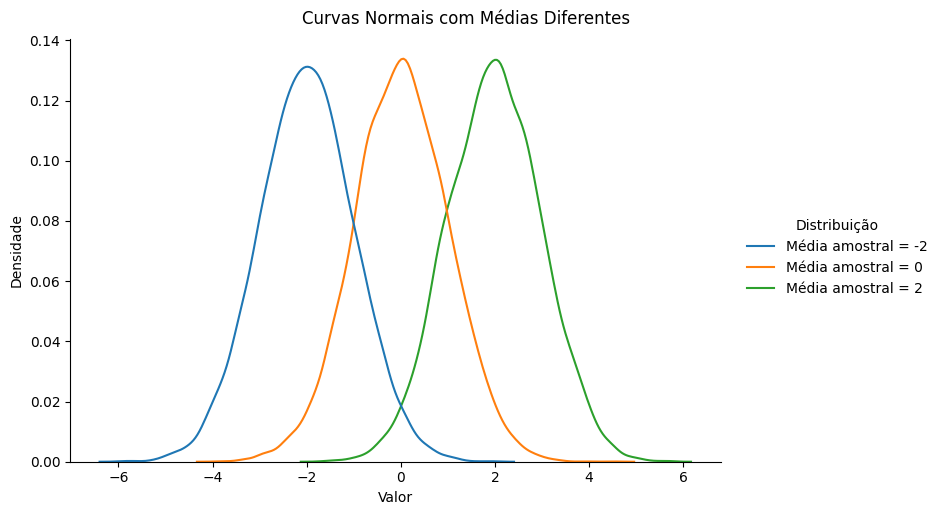

In [ ]:
np.random.seed(42)

# Número de amostras para cada distribuição
n = 10000

# --- Dados para distribuições com médias diferentes (variância fixa em 1) ---
mean = [-2, 0, 2]  # Médias diferentes
data_means = pd.DataFrame({
    'valor':  np.concatenate([np.random.normal(loc=m, scale=1, size=n) for m in mean]),
    'Distribuição': np.concatenate([[f'Média amostral = {m}'] * n for m in mean])
})


# Plot das distribuições com médias diferentes utilizando displot com KDE
g1 = sns.displot(data=data_means, x='valor', hue='Distribuição', kind='kde',
                 height=5, aspect=1.5)
g1.fig.suptitle('Amostras com Médias Diferentes', y=1.02)
g1.set_axis_labels("Valor", "Densidade")
plt.show()


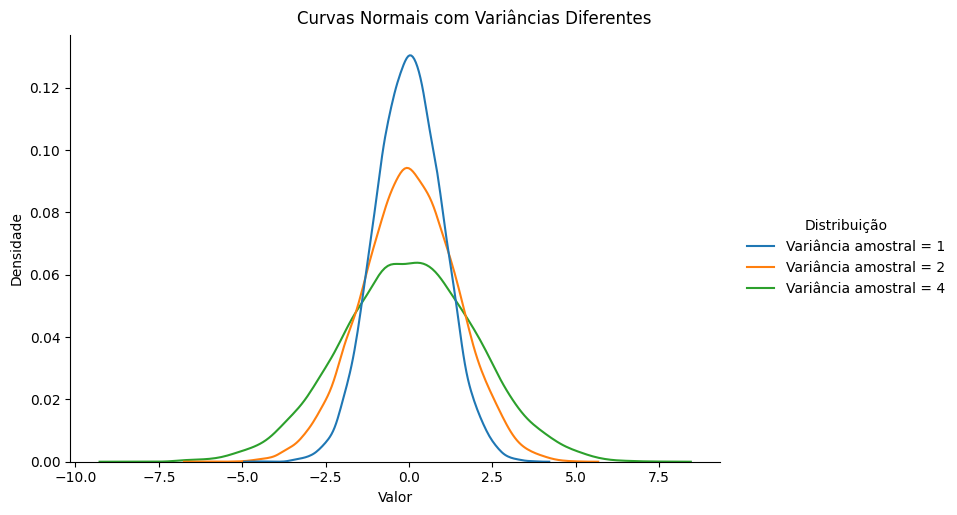

In [ ]:

# --- Dados para distribuições com variâncias diferentes (média fixa em 0) ---
var = [1, 2, 4]
data_vars = pd.DataFrame({
    'valor': np.concatenate([np.random.normal(loc=0, scale=v**.5, size=n) for v in var]),
    'Distribuição': np.concatenate([[f'Variância amostral = {v}'] * n for v in var])
})

# Plot das distribuições com variâncias diferentes utilizando displot com KDE
g2 = sns.displot(data=data_vars, x='valor', hue='Distribuição', kind='kde',
                 height=5, aspect=1.5)
g2.fig.suptitle('Amostras com Variâncias Diferentes', y=1.02)
g2.set_axis_labels("Valor", "Densidade")
plt.show()